## 1.6  Сплайн - аппроксимация

In [286]:
import numpy as np
import scipy.linalg as la
import scipy.interpolate as interp
import matplotlib.pyplot as plt
import scipy

### Построение сглаживающего сплайна

#####  построение интерполяционного сплайна рассмотрено в разделе 1.1

In [287]:
def SplineCoefs(x, y, num_of_nodes, Xk, aplha):
    
    # calculation of cubic spline coefficients
    
    # x, y - data set
    # num_of_nodes - number of nodes for spline approximation
    # Xk - vector of x-values at the nodes
    # aplha - regularization parameter
    
    n = len(x)
    e = np.eye (n)
    Phi = np.zeros ((n,num_of_nodes+4)) # Matrix of basic functions
    
    RegAlpha = np.eye (num_of_nodes+4) * alpha     
        
    Phi = BasicFunctionsSpline (num_of_nodes, Xk, x) 
    
    PhiT = Phi.T
    G = PhiT @ Phi + RegAlpha
    z = PhiT @ y
    a = np.linalg.solve(G, z)
    
    return a

def SplineCoefsN(x, y, num_of_nodes, Xk, aplha):
    
    # calculation of NATURALE cubic spline coefficients
    
    # x, y - data set
    # num_of_nodes - number of nodes for spline approximation
    # Xk - vector of x-values at the nodes
    # aplha - regularization parameter
    
    n = len(x)
    e = np.eye (n)
    Phi = np.zeros ((n, num_of_nodes)) # Matrix of basic functions
    
    RegAlpha = np.eye (num_of_nodes) * alpha     
        
    Phi = BasicFunctionsSplineN (num_of_nodes, Xk, x)  
        
    PhiT = Phi.T
    G = PhiT @ Phi + RegAlpha
    z = PhiT @ y
    a = np.linalg.solve(G, z)
    
    return a

def SplineValues(a, x):
    
    # calculation of NATURALE spline values
    
    Phi = BasicFunctionsSpline (num_of_nodes, Xk, x)
    values = Phi@a
    
    return values

def SplineValuesN(a, x):
    
    # calculation of Natural cubic spline values
    
    Phi = BasicFunctionsSplineN (num_of_nodes, Xk, x)
    values = Phi@a
    
    return values

def BasicFunctionsSpline(num_of_nodes, Xk, x):
    
    # basic functions for cubic spline
    
    m = num_of_nodes + 4
    
    PhiFunArray = np.zeros ((len(x), m)) # Matrix of basic functions
    
    #print (PhiFunArray.shape)
    
    PhiFunArray [:,0] = 1 
    PhiFunArray [:,1] = x; PhiFunArray [:,2] = x**2; PhiFunArray [:,3] = x**3
    
    for k in range (0, num_of_nodes):
        PhiFunArray [:,k+4] = 0.
        for i in range (0, len(x)):
            if (x[i]>Xk[k]):
                PhiFunArray [i,k+4] = (x[i] - Xk[k])**3
    
    return PhiFunArray

def BasicFunctionsSplineN(num_of_nodes, Xk, x):
    
    # basic functions for NATURALE cubic spline
    
    m = num_of_nodes #+ 2
    
    PhiFunArray = np.zeros ((len(x), m)) # Matrix of basic functions
    
    Dkk = np.zeros ((len(x), m))
    Dk = np.zeros ((len(x), m))
    
    #print (PhiFunArray.shape)
    
    PhiFunArray [:,0] = 1 
    PhiFunArray [:,1] = x 
    
    for k in range (0, num_of_nodes):
        Dkk [:,k] = 0.
        for i in range (0, len(x)):
            if (x[i]>Xk[k]):
                Dkk [i,k] = (x[i] - Xk[k])**3
    
                    
    for k in range (0, num_of_nodes-1):
        Dk[:,k] = (Dkk [:,k] - Dkk [:,num_of_nodes-1])/(Xk[num_of_nodes-1]-Xk[k])
        
         
    for k in range (0, num_of_nodes-2):
        PhiFunArray [:,k+2] = Dk[:,k] - Dk[:,num_of_nodes-2]
    
           
    return PhiFunArray

### Пример 

0.3333333333333333 [-0.66666667 -0.33333333  0.          0.33333333  0.66666667]


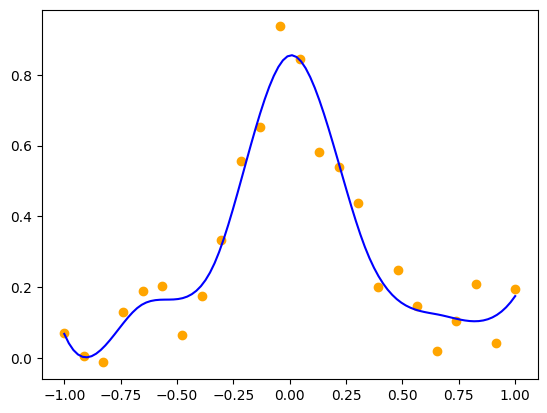

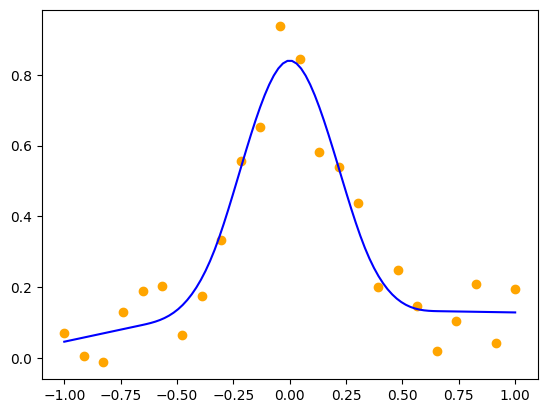

In [288]:
xleft = -1.0; xright = 1.0
n = 24
x = np.linspace(xleft,xright,n)
yf = 1./(1.+25.*x**2)

Delta = 0.1 * np.random.randn(len(x))
y = yf + Delta

num_of_nodes = 5

Xk = np.zeros (num_of_nodes)

dx = (xright - xleft)/(num_of_nodes+1)

for k in range (0, num_of_nodes):
    Xk[k] = xleft + dx*(k+1)
    
#Xk = np.sort(xleft + np.random.random(num_of_nodes)*(xright-xleft))
    
print (dx, Xk)

nplot = 100
xplot = np.linspace(xleft,xright,nplot)
yplot_exact = 1./(1.+25.*xplot**2)


alpha = 0.000

a = SplineCoefs (x, y, num_of_nodes, Xk, alpha)

ySpline = SplineValues(a, xplot)

plt.plot (x, y, 'o', color = 'orange')
plt.plot (xplot, ySpline, color = 'blue')
#plt.plot (xplot, yplot_exact, color = 'red')
plt.figure()
     
alpha = 0.000

a = SplineCoefsN (x, y, num_of_nodes, Xk, alpha)

ySpline = SplineValuesN(a, xplot)

plt.plot (x, y, 'o', color = 'orange')
plt.plot (xplot, ySpline,'blue' )
#plt.plot (xplot, yplot_exact, color = 'red')



# Домашняя работа

## Определение базисных функций для кубического и натурального кубического сплайнов

Для кубического сплайна базисные функции включают полиномы степеней до трёх и дополнительные кубические функции, которые зависят от узловых точек $X_k$. 

### Базисные функции для кубического сплайна

Обозначим $\Phi(x)$ как вектор базисных функций для кубического сплайна, тогда:

$$
\Phi(x) = [1, x, x^2, x^3, \phi_1(x), \phi_2(x), \dots, \phi_{m}(x)]
$$

где $\phi_k(x)$ — это кусочно-заданные функции, определяемые следующим образом для каждого узла $X_k$:

$$
\phi_k(x) = 
\begin{cases} 
(x - X_k)^3, & \text{если } x > X_k \\
0, & \text{если } x \leq X_k 
\end{cases}
$$

Таким образом, матрица базисных функций $\Phi$ для всех точек данных $x$ имеет вид:

$$
\Phi = 
\begin{bmatrix}
1 & x_1 & x_1^2 & x_1^3 & \phi_1(x_1) & \dots & \phi_{m}(x_1) \\
1 & x_2 & x_2^2 & x_2^3 & \phi_1(x_2) & \dots & \phi_{m}(x_2) \\
\vdots & \vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_n & x_n^2 & x_n^3 & \phi_1(x_n) & \dots & \phi_{m}(x_n) \\
\end{bmatrix}
$$

где $n$ — количество точек данных, а $m$ — количество узлов.

### Базисные функции для натурального кубического сплайна

В случае натурального кубического сплайна, чтобы удовлетворять граничным условиям, используем модифицированные базисные функции:

$$
\Phi(x) = [1, x, \psi_1(x), \psi_2(x), \dots, \psi_{m-2}(x)]
$$

где $\psi_k(x)$ определяются через кубические выражения в узлах $X_k$ по следующему правилу:

1. Определим промежуточные функции $D_{kk}(x)$ для узлов:
   $$
   D_{kk}(x) = 
   \begin{cases} 
   (x - X_k)^3, & \text{если } x > X_k \\
   0, & \text{если } x \leq X_k 
   \end{cases}
   $$

2. Затем рассчитаем нормализованные функции $D_k(x)$:
   $$
   D_k(x) = \frac{D_{kk}(x) - D_{kk}(X_m)}{X_m - X_k}
   $$

3. Наконец, определим конечные базисные функции $\psi_k(x)$:
   $$
   \psi_k(x) = D_k(x) - D_{m-1}(x)
   $$

Матрица базисных функций для натурального кубического сплайна, аналогично, имеет вид:

$$
\Phi = 
\begin{bmatrix}
1 & x_1 & \psi_1(x_1) & \dots & \psi_{m-2}(x_1) \\
1 & x_2 & \psi_1(x_2) & \dots & \psi_{m-2}(x_2) \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_n & \psi_1(x_n) & \dots & \psi_{m-2}(x_n) \\
\end{bmatrix}
$$

где $m$ — количество узлов для натурального сплайна.


In [289]:
def BasicFunctionsSpline(num_of_nodes, Xk, x):
    """
    Формирование матрицы базисных функций для кубического сплайна.

    Аргументы:
    num_of_nodes -- количество узлов (внутри отрезка).
    Xk -- вектор x-координат узлов.
    x -- данные, для которых создаются базисные функции.

    Возвращает:
    PhiFunArray -- матрица базисных функций.
    """
    m = num_of_nodes + 4
    PhiFunArray = np.zeros((len(x), m))  # Матрица базисных функций
    
    # Добавляем базисные функции 1, x, x^2, x^3
    PhiFunArray[:, 0] = 1
    PhiFunArray[:, 1] = x
    PhiFunArray[:, 2] = x ** 2
    PhiFunArray[:, 3] = x ** 3
    
    # Создаем кубические базисные функции на интервалах (x - Xk)^3 для x > Xk
    for k in range(num_of_nodes):
        for i in range(len(x)):
            if x[i] > Xk[k]:
                PhiFunArray[i, k + 4] = (x[i] - Xk[k]) ** 3
    
    return PhiFunArray

def BasicFunctionsSplineN(num_of_nodes, Xk, x):
    """
    Формирование матрицы базисных функций для натурального кубического сплайна.

    Аргументы:
    num_of_nodes -- количество узлов (внутри отрезка).
    Xk -- вектор x-координат узлов.
    x -- данные, для которых создаются базисные функции.

    Возвращает:
    PhiFunArray -- матрица базисных функций.
    """
    m = num_of_nodes
    PhiFunArray = np.zeros((len(x), m))  # Матрица базисных функций
    
    Dkk = np.zeros((len(x), m))
    Dk = np.zeros((len(x), m))
    
    # Добавляем базисные функции 1 и x
    PhiFunArray[:, 0] = 1
    PhiFunArray[:, 1] = x
    
    # Кубические базисные функции для натурального сплайна
    for k in range(num_of_nodes):
        for i in range(len(x)):
            if x[i] > Xk[k]:
                Dkk[i, k] = (x[i] - Xk[k]) ** 3
    
    for k in range(num_of_nodes - 1):
        Dk[:, k] = (Dkk[:, k] - Dkk[:, num_of_nodes - 1]) / (Xk[num_of_nodes - 1] - Xk[k])
        
    for k in range(num_of_nodes - 2):
        PhiFunArray[:, k + 2] = Dk[:, k] - Dk[:, num_of_nodes - 2]
    
    return PhiFunArray

## Кубический сплайн и натуральный кубический сплайн

In [290]:
def SplineValues(a, x, num_of_nodes, Xk):
    """
    Вычисление значений кубического сплайна для заданных точек x.

    Аргументы:
    a -- коэффициенты сплайна.
    x -- точки, в которых вычисляются значения сплайна.
    num_of_nodes -- количество узлов.
    Xk -- вектор x-координат узлов.

    Возвращает:
    values -- значения сплайна в точках x.
    """
    # Создаем матрицу базисных функций и вычисляем значения сплайна
    Phi = BasicFunctionsSpline(num_of_nodes, Xk, x)
    values = Phi @ a
    
    return values

def SplineValuesN(a, x, num_of_nodes, Xk):
    """
    Вычисление значений натурального кубического сплайна для заданных точек x.

    Аргументы:
    a -- коэффициенты сплайна.
    x -- точки для вычисления значений сплайна.
    num_of_nodes -- количество узлов.
    Xk -- вектор x-координат узлов.

    Возвращает:
    values -- значения сплайна в точках x.
    """
    # Создаем матрицу базисных функций и вычисляем значения натурального сплайна
    Phi = BasicFunctionsSplineN(num_of_nodes, Xk, x)
    values = Phi @ a
    
    return values

## Кубический сплайн и натуральный кубический сплайн с регуляризацией

In [291]:
def SplineCoefs(x, y, num_of_nodes, Xk, alpha):
    """
    Вычисление коэффициентов для кубического сплайна с регуляризацией.

    Аргументы:
    x, y -- данные, которые необходимо аппроксимировать сплайном.
    num_of_nodes -- количество узлов для сплайн-аппроксимации.
    Xk -- вектор x-координат узлов, в которых будет применяться сплайн.
    alpha -- параметр регуляризации для сглаживания сплайна.

    Возвращает:
    a -- коэффициенты сплайна.
    """
    n = len(x)
    
    # Создаем матрицу базисных функций для кубического сплайна
    Phi = BasicFunctionsSpline(num_of_nodes, Xk, x)
    
    # Матрица регуляризации, используется для контроля гладкости сплайна
    RegAlpha = np.eye(num_of_nodes + 4) * alpha
    
    # Решение системы уравнений методом наименьших квадратов с регуляризацией
    PhiT = Phi.T
    G = PhiT @ Phi + RegAlpha
    z = PhiT @ y
    a = np.linalg.solve(G, z)
    
    return a

def SplineCoefsN(x, y, num_of_nodes, Xk, alpha):
    """
    Вычисление коэффициентов для натурального кубического сплайна с регуляризацией.

    Аргументы:
    x, y -- данные для аппроксимации.
    num_of_nodes -- количество узлов для сплайн-аппроксимации.
    Xk -- вектор x-координат узлов.
    alpha -- параметр регуляризации.

    Возвращает:
    a -- коэффициенты сплайна.
    """
    n = len(x)
    
    # Создаем матрицу базисных функций для натурального кубического сплайна
    Phi = BasicFunctionsSplineN(num_of_nodes, Xk, x)
    
    # Матрица регуляризации для сглаживания
    RegAlpha = np.eye(num_of_nodes) * alpha
    
    # Решение системы уравнений методом наименьших квадратов
    PhiT = Phi.T
    G = PhiT @ Phi + RegAlpha
    z = PhiT @ y
    a = np.linalg.solve(G, z)
    
    return a

## Пример

[-0.66666667 -0.33333333  0.          0.33333333  0.66666667]


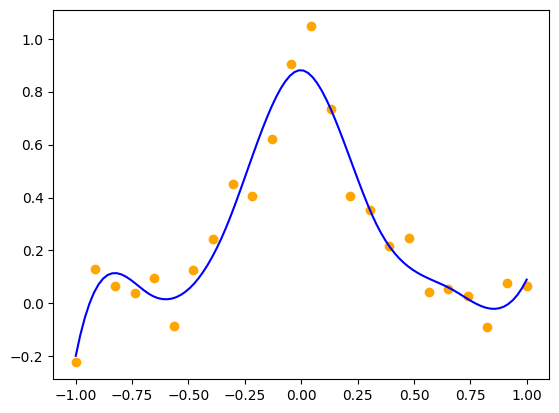

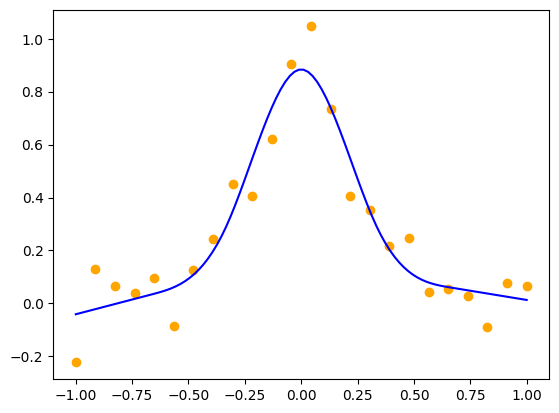

In [292]:
xleft = -1.0; xright = 1.0
n = 24
x = np.linspace(xleft,xright,n) # тренировочные двнные
yf = 1./(1.+25.*x**2) # исходная функция без шума

Delta = 0.1 * np.random.randn(len(x))
y = yf + Delta # зашумленная функция

num_of_nodes = 5 # количество разбиений

Xk = np.zeros(num_of_nodes) # точки разбиения

dx = (xright - xleft)/(num_of_nodes+1)

for k in range(0, num_of_nodes):
    Xk[k] = xleft + dx*(k+1)
    
    
print(Xk)

nplot = 100
xplot = np.linspace(xleft,xright,nplot) # точки для сплайна, тестовые
yplot_exact = 1./(1.+25.*xplot**2)


alpha = 0

a = SplineCoefs(x, y, num_of_nodes, Xk, alpha)

ySpline = SplineValues(a, xplot, num_of_nodes, Xk)

plt.plot(x, y, 'o', color = 'orange')
plt.plot(xplot, ySpline, color = 'blue')
plt.figure()
     
alpha = 0

a = SplineCoefsN(x, y, num_of_nodes, Xk, alpha)

ySpline = SplineValuesN(a, xplot, num_of_nodes, Xk)

plt.plot(x, y, 'o', color = 'orange')
plt.plot(xplot, ySpline,'blue' )



## Подбор гиперпараметра (количество точек разбиениия)

In [293]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Функция для вычисления MSE 
def evaluate_spline(x, y, num_of_nodes, Xk, alpha):
    a = SplineCoefs(x, y, num_of_nodes, Xk, alpha)
    y_pred = SplineValues(a, x, num_of_nodes, Xk)
    mse = mean_squared_error(y, y_pred)
    return mse

# Основная функция подбора оптимального количества узлов
def select_best_num_of_nodes(x, y, num_nodes_range, alpha, n_splits=5):
    best_num_of_nodes = None
    best_mse = float('inf')
    
    # Разделение данных для кросс-валидации
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    # Проход по всем вариантам количества узлов разбиения
    for num_of_nodes in num_nodes_range:
        # Создаем узловые точки для текущего количества узлов
        Xk = np.zeros(num_of_nodes) # точки разбиения
        dx = (xright - xleft)/(num_of_nodes+1)
        for k in range(0, num_of_nodes):
            Xk[k] = xleft + dx*(k+1)
        
        # Считаем среднюю ошибку по всем разбиениям
        mse_scores = []
        for train_index, test_index in kf.split(x):
            x_train, x_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            a = SplineCoefs(x_train, y_train, num_of_nodes, Xk, alpha)
            y_pred = SplineValues(a, x_test, num_of_nodes, Xk)
            
            mse = mean_squared_error(y_test, y_pred)
            mse_scores.append(mse)
        
        avg_mse = np.mean(mse_scores)
        
        # Обновляем оптимальное количество узлов, если нашли лучшее значение MSE
        if avg_mse < best_mse:
            best_mse = avg_mse
            best_num_of_nodes = num_of_nodes
            
        print(f'Количество узлов: {num_of_nodes}, Средняя MSE: {avg_mse}')
    
    print(f'\nОптимальное количество узлов: {best_num_of_nodes}, Минимальная MSE: {best_mse}')
    return best_num_of_nodes, best_mse

In [294]:
num_nodes_range = range(3, 11)
best_num_of_nodes, best_mse = select_best_num_of_nodes(x, y, num_nodes_range, alpha)

Количество узлов: 3, Средняя MSE: 0.09472404900031568
Количество узлов: 4, Средняя MSE: 0.5871187632934117
Количество узлов: 5, Средняя MSE: 0.0586468322855254
Количество узлов: 6, Средняя MSE: 2.500814221075861
Количество узлов: 7, Средняя MSE: 96.21951825040563
Количество узлов: 8, Средняя MSE: 138536.9804045153
Количество узлов: 9, Средняя MSE: 5332713.687294166
Количество узлов: 10, Средняя MSE: 1.916838580082905e+16

Оптимальное количество узлов: 5, Минимальная MSE: 0.0586468322855254


<Figure size 640x480 with 0 Axes>

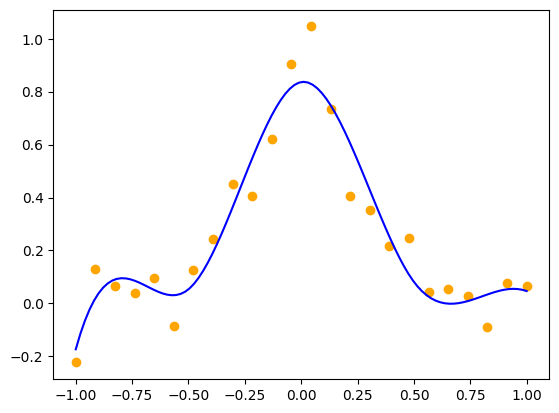

<Figure size 640x480 with 0 Axes>

In [295]:
num_of_nodes = 3
Xk = np.zeros(num_of_nodes) 
dx = (xright - xleft)/(num_of_nodes+1)
for k in range(0, num_of_nodes):
    Xk[k] = xleft + dx*(k+1)

alpha = 0
a = SplineCoefs(x, y, num_of_nodes, Xk, alpha)
ySpline = SplineValues(a, xplot, num_of_nodes, Xk)

plt.plot(x, y, 'o', color = 'orange')
plt.plot(xplot, ySpline, color = 'blue')
plt.figure()

## Робастный вариант

In [296]:
def SqLeastRobust(x, y, num_of_nodes, Xk, alpha, metric='huber', delta=0.01, tol=1e-6, max_iter=100):
    Phi = BasicFunctionsSpline(num_of_nodes, Xk, x)
    
    # Матрица регуляризации, используется для контроля гладкости сплайна
    RegAlpha = np.eye(num_of_nodes + 4) * alpha
    
    # Решение системы уравнений методом наименьших квадратов с регуляризацией
    # база итерационного процесса
    PhiT = Phi.T
    G = PhiT @ Phi + RegAlpha
    z = PhiT @ y
    a = np.linalg.solve(G, z)
    
    for _ in range(max_iter):
        s = y - Phi @ a  # остаток, ошибка апроксимации
        if metric == 'huber':
            weights = np.where(np.abs(s) <= delta, 0.5, delta / np.abs(s) - delta*delta/(2*s*s))
        elif metric == 'tukey':
             weights = np.where(np.abs(s) <= delta, 1, (delta*delta)/(s*s))
        else:
            raise ValueError("Unknown method: choose 'huber' or 'tukey'")
        
        W = np.diag(weights)  # матрица весов
        G_weighted = PhiT @ W @ Phi
        z_weighted = PhiT @ W @ y
        a_new = np.linalg.solve(G_weighted, z_weighted)
        
        # Проверка на сходимость
        if np.linalg.norm(a_new - a) < tol:
            break
        a = a_new
    
    return a

## Пример для робастности

In [297]:
np.random.seed(42)

xleft = -1.0; xright = 1.0
n = 50
x = np.linspace(xleft,xright,n) # тренировочные двнные
yf = 1./(1.+25.*x**2) # исходная функция без шума

Delta = 0.1 * np.random.randn(len(x))
y = yf + Delta # зашумленная функция

print(y)

y[3] = 1
y [15] = 0.1
y[20] = 1

[ 0.08813295  0.02783879  0.11004853  0.20167986  0.03062959  0.03597877
  0.22347581  0.14944377  0.03409624  0.14511349  0.05615119  0.0698335
  0.15739272 -0.03767386  0.00634033  0.15390603  0.14814552  0.33057749
  0.27155799  0.30126871  0.68904115  0.63958453  0.80020953  0.77184354
  0.9352567   1.00078723  0.799219    0.83102651  0.60209829  0.5133069
  0.38232842  0.54758822  0.29780303  0.14365754  0.29238927  0.05674775
  0.17454053 -0.06277052 -0.01641213  0.12217908  0.16470415  0.09818051
  0.06113547  0.03544415 -0.08845973 -0.01793949  0.003313    0.1509919
  0.07602705 -0.13784248]


<Figure size 640x480 with 0 Axes>

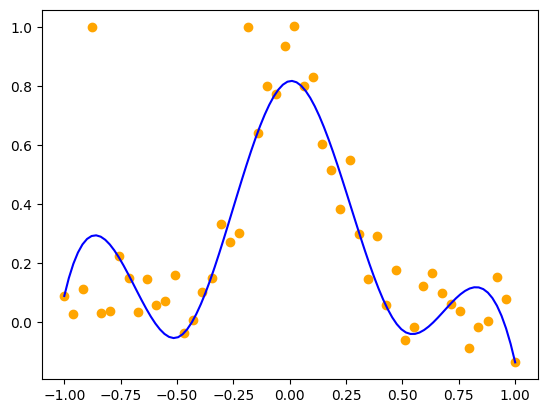

<Figure size 640x480 with 0 Axes>

In [298]:
num_of_nodes = 3
Xk = np.zeros(num_of_nodes) 
dx = (xright - xleft)/(num_of_nodes+1)
for k in range(0, num_of_nodes):
    Xk[k] = xleft + dx*(k+1)

alpha = 0
a = SqLeastRobust(x, y, num_of_nodes, Xk, alpha, metric='tukey')
ySpline = SplineValues(a, xplot, num_of_nodes, Xk)

plt.plot(x, y, 'o', color = 'orange')
plt.plot(xplot, ySpline, color = 'blue')
plt.figure()